# **Stroke Dataset Visualization**

In [ ]:
import os
import glob
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import numpy as np

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
working_dir = "/content/drive/MyDrive/KDD Project"

In [ ]:
stroke_pf = pd.read_csv(working_dir + '/healthcare-dataset-stroke-data.csv')

### **Data Understanding and Exploration**

Displaying the attributes/labels present in dataset.

Stroke prediction dataset consists of 12 features.

In [ ]:
stroke_pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Displaying the first 15 rows of dataset

In [ ]:
stroke_pf.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


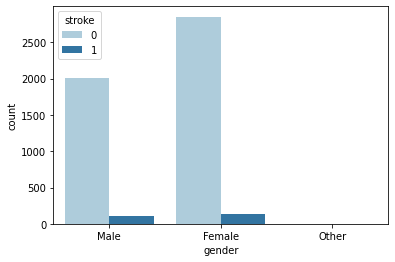

In [ ]:
sns.countplot(x=stroke_pf['gender'], palette="Paired", hue=stroke_pf['stroke']);

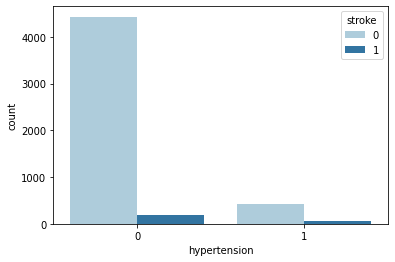

In [ ]:
sns.countplot(x=stroke_pf['hypertension'], palette="Paired", hue=stroke_pf['stroke']);

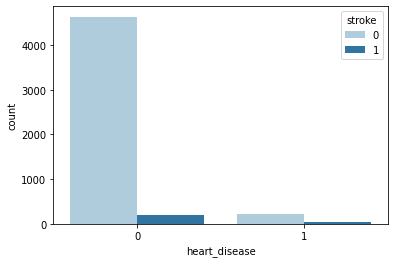

In [ ]:
sns.countplot(x=stroke_pf['heart_disease'], palette="Paired", hue=stroke_pf['stroke']);

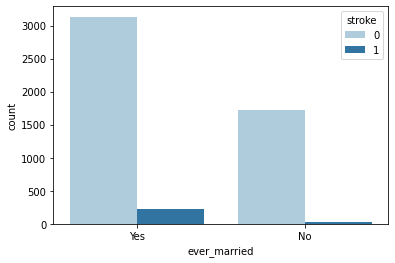

In [ ]:
sns.countplot(x=stroke_pf['ever_married'], palette="Paired", hue=stroke_pf['stroke']);

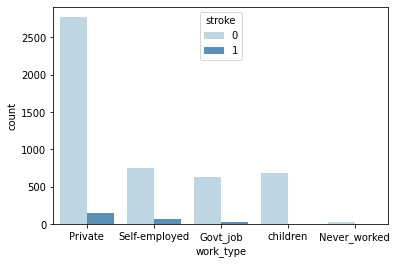

In [ ]:
sns.countplot(x=stroke_pf['work_type'], alpha=0.8, palette="Paired",hue=stroke_pf['stroke'])

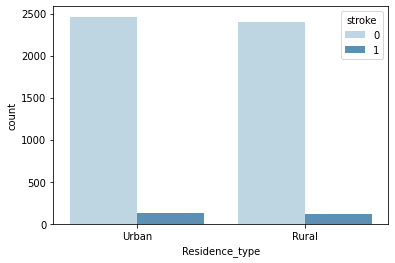

In [ ]:
sns.countplot(x=stroke_pf['Residence_type'], alpha=0.8, palette="Paired",hue=stroke_pf['stroke'])

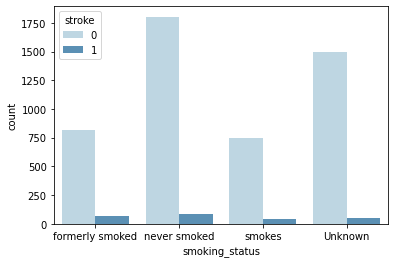

In [ ]:
sns.countplot(x=stroke_pf['smoking_status'], alpha=0.8, palette="Paired",hue=stroke_pf['stroke'])


<Figure size 1080x1080 with 0 Axes>

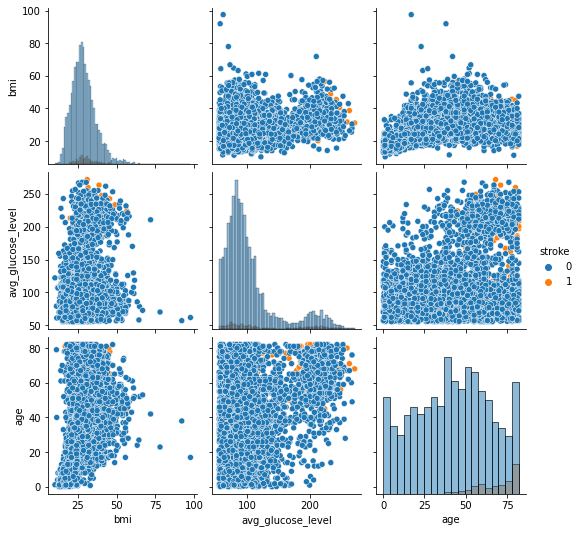

In [ ]:
plt.figure(figsize = (15,15))
sns.pairplot(stroke_pf, x_vars = ['bmi', 'avg_glucose_level', 'age'],y_vars = ['bmi', 'avg_glucose_level', 'age'], hue = 'stroke', diag_kind='hist')

Based on the graphs above, it appears that there is no substantial relationship between stroke risk and the characteristics of smoking, work type, or residence choice. However, factors such as gender, hypertension, and a history of heart disease have an impact on the risk of stroke. But there exists a strong relation between Age, Average Glucose Level, BMI and stroke probability.

### **Data Preprocessing**

Handling Missing Values

In [ ]:
F_missing_bmi_index = stroke_pf[(stroke_pf.gender == 'Female') & (stroke_pf.bmi.isna())].index
stroke_pf.loc[F_missing_bmi_index, 'bmi'] = 29

M_missing_bmi_index = stroke_pf[(stroke_pf.gender == 'Male') & (stroke_pf.bmi.isna())].index
stroke_pf.loc[M_missing_bmi_index, 'bmi'] = 28

other_index = stroke_pf[stroke_pf['gender'] =='Other'].index
stroke = stroke_pf.drop(other_index)


### **Data Preparation for Modeling**

**1. Handling Imbalanced Data**

From the graph below, we can find that the stroke prediction is highly imbalanced towards predicting the preson has low chnace of getting stroke.As a result, in order to get an efficient model, this unbalanced data must be dealt with first. The method of under-sampling is employed for this purpose.

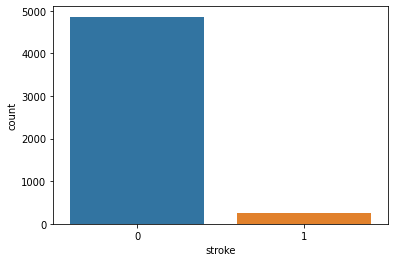

In [ ]:
sns.countplot(x=stroke_pf.stroke, data=stroke_pf)

**UnderSampling**

Undersampling equalizes the data by undersampling the majority class to match the minority class. In this scenario, the class with the value "0" is undersampled in comparison to the class with the value "1." The final dataset will include 249 rows with value '0' and 249 rows with value '1' after undersampling.

**2. Label Encoding**

Label encoding converts the dataset's string literals into integer values so that the machine can understand them.

In [ ]:
stroke_pf['gender'] = stroke_pf['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
stroke_pf['Residence_type'] = stroke_pf['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
stroke_pf['work_type'] = stroke_pf['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
stroke_pf['ever_married'] = stroke_pf['ever_married'].replace({'Yes':1, 'No':0}).astype(np.uint8)
stroke_pf['smoking_status'] = stroke_pf['smoking_status'].replace({'never smoked':0,'Unknown':-1,'formerly smoked':2,'smokes':1}).astype(np.uint8)

In [ ]:
stroke_pf.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,1,228.69,36.6,2,1
1,51676,1,61.0,0,0,1,1,0,202.21,29.0,0,1
2,31112,0,80.0,0,1,1,0,0,105.92,32.5,0,1
3,60182,1,49.0,0,0,1,0,1,171.23,34.4,1,1
4,1665,1,79.0,1,0,1,1,0,174.12,24.0,0,1


**References**

https://thesai.org/Downloads/Volume12No6/Paper_62-Analyzing_the_Performance_of_Stroke_Prediction.pdf